<a href="https://colab.research.google.com/github/GDAMPraveen/Mountain-Minning/blob/main/Mountain_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI-Based Mining Feasibility and Environmental Risk Analysis in India**

## **Introduction**



*   **India possesses vast mineral resources that play a crucial role in economic development, infrastructure growth, and employment generation. However, mining activities also pose significant environmental, ecological, and social risks, particularly in ecologically sensitive regions such as mountain ranges, forested areas, wildlife habitats, and river basins. Unregulated or poorly planned mining can lead to deforestation, water and air pollution, biodiversity loss, land degradation, and increased disaster vulnerability.**

* **With the availability of geospatial, environmental, climatic, and socio-economic data, Artificial Intelligence (AI) and data analytics can be effectively used to assess mining feasibility in a systematic and data-driven manner. This project analyzes a comprehensive dataset covering terrain characteristics, environmental indicators, climate variables, infrastructure accessibility, socio-economic factors, and historical risk records to identify regions where mining can be permitted and areas where it should be restricted.**

## **Problem Statement**

**Mining feasibility decisions in India are complex due to the interaction of multiple factors, including environmental protection laws, climatic conditions, geological stability, population density, and infrastructure availability. Traditional decision-making approaches often rely on isolated parameters, which may overlook cumulative environmental risks.**

**Key challenges addressed in this project include:**


*   **Identifying regions where mining is environmentally and legally permissible.**
*   **Understanding the impact of terrain features such as elevation, slope, and forest cover on mining decisions.**


*   **Analyzing the role of climatic factors like rainfall and temperature in increasing environmental hazards**
*   **Evaluating socio-economic influences, including population density and employment dependency on mining.**



*   **Assessing the influence of infrastructure availability and historical mining accidents on mining approvals.**
*   **Understanding how seismic activity and ecological sensitivity affect mining restrictions.**

**The goal of this analysis is to use data visualization and exploratory data analysis (EDA) techniques to uncover patterns and relationships that influence mining feasibility. The insights derived from this study aim to support sustainable mining practices, minimize environmental damage, and assist policymakers in making informed, balanced decisions that consider both economic development and ecological conservation.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv('/content/Mountain_Mining.csv',low_memory=False)

In [ ]:
df

,Region_ID,State,Mountain_Range,Nearby_River,Wildlife_Sanctuary,Restriction_Type,Dominant_Trees,Key_Animals,Minerals_Present,Elevation_m,...,Population_Density_per_km2,Land_Use_Type,Mining_Employment_Dependency_%,Past_Mining_Accidents,Previous_Hazard_Report,Distance_to_Road_km,Distance_to_Rail_km,Distance_to_Town_km,Road_Connectivity,Rail_Connectivity
0,R1,Karnataka,Western Ghats,Sharavathi,Dandeli Wildlife Sanctuary,Wildlife Sanctuary,"Teak, Rosewood","Tiger, Elephant","Gold, Iron Ore",318,...,1108,Forest,25,4,Medium,13.2,40.0,68.1,Moderate,Low
1,R2,Chhattisgarh,Maikal Hills,Hasdeo,Achanakmar Wildlife Sanctuary,Biosphere Reserve,"Sal, Mahua","Bear, Tiger","Coal, Bauxite",320,...,1223,Agriculture,23,1,Low,6.8,13.6,26.3,Moderate,NaN
2,R3,Odisha,Eastern Ghats,Brahmani,Similipal Wildlife Sanctuary,Biosphere Reserve,"Sal, Bamboo","Elephant, Tiger","Iron Ore, Bauxite",655,...,611,Agriculture,24,2,High,3.8,17.2,104.1,Moderate,NaN
3,R4,Telangana,Eastern Ghats,Godavari,Kawal Wildlife Sanctuary,Wildlife Sanctuary,"Teak, Neem","Tiger, Deer","Granite, Limestone",179,...,272,Agriculture,5,0,High,12.1,28.3,33.0,Moderate,Low
4,R5,Assam,Eastern Himalayas,Brahmaputra,Kaziranga Wildlife Sanctuary,National Park,"Elephant Grass, Reed","Rhino, Deer","Coal, Limestone",200,...,953,Urban,15,0,Low,10.9,6.7,81.8,Moderate,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,R9996,Goa,Western Ghats,Mandovi,Bhagwan Mahavir Sanctuary,Wildlife Sanctuary,"Evergreen Trees, Bamboo","Hornbill, Deer","Iron Ore, Laterite",135,...,276,Urban,19,0,Low,11.0,9.4,60.1,Moderate,Medium
9996,R9997,Karnataka,Western Ghats,Sharavathi,Dandeli Wildlife Sanctuary,Wildlife Sanctuary,"Teak, Rosewood","Tiger, Elephant","Gold, Iron Ore",400,...,1248,Forest,67,0,Low,19.1,48.7,23.0,Poor,High
9997,R9998,Telangana,Eastern Ghats,Godavari,Kawal Wildlife Sanctuary,Wildlife Sanctuary,"Teak, Neem","Tiger, Deer","Granite, Limestone",279,...,318,Agriculture,40,0,Low,11.1,43.6,141.9,Moderate,Low
9998,R9999,Madhya Pradesh,Satpura Range,Narmada,Pachmarhi Wildlife Sanctuary,Biosphere Reserve,"Teak, Sal","Gaur, Leopard","Manganese, Copper",235,...,1383,Mixed,19,0,High,17.2,11.8,134.2,Poor,High


In [ ]:
df.head(3)

,Region_ID,State,Mountain_Range,Nearby_River,Wildlife_Sanctuary,Restriction_Type,Dominant_Trees,Key_Animals,Minerals_Present,Elevation_m,...,Population_Density_per_km2,Land_Use_Type,Mining_Employment_Dependency_%,Past_Mining_Accidents,Previous_Hazard_Report,Distance_to_Road_km,Distance_to_Rail_km,Distance_to_Town_km,Road_Connectivity,Rail_Connectivity
0,R1,Karnataka,Western Ghats,Sharavathi,Dandeli Wildlife Sanctuary,Wildlife Sanctuary,"Teak, Rosewood","Tiger, Elephant","Gold, Iron Ore",318,...,1108,Forest,25,4,Medium,13.2,40.0,68.1,Moderate,Low
1,R2,Chhattisgarh,Maikal Hills,Hasdeo,Achanakmar Wildlife Sanctuary,Biosphere Reserve,"Sal, Mahua","Bear, Tiger","Coal, Bauxite",320,...,1223,Agriculture,23,1,Low,6.8,13.6,26.3,Moderate,NaN
2,R3,Odisha,Eastern Ghats,Brahmani,Similipal Wildlife Sanctuary,Biosphere Reserve,"Sal, Bamboo","Elephant, Tiger","Iron Ore, Bauxite",655,...,611,Agriculture,24,2,High,3.8,17.2,104.1,Moderate,NaN


In [ ]:
df.tail(3)

,Region_ID,State,Mountain_Range,Nearby_River,Wildlife_Sanctuary,Restriction_Type,Dominant_Trees,Key_Animals,Minerals_Present,Elevation_m,...,Population_Density_per_km2,Land_Use_Type,Mining_Employment_Dependency_%,Past_Mining_Accidents,Previous_Hazard_Report,Distance_to_Road_km,Distance_to_Rail_km,Distance_to_Town_km,Road_Connectivity,Rail_Connectivity
9997,R9998,Telangana,Eastern Ghats,Godavari,Kawal Wildlife Sanctuary,Wildlife Sanctuary,"Teak, Neem","Tiger, Deer","Granite, Limestone",279,...,318,Agriculture,40,0,Low,11.1,43.6,141.9,Moderate,Low
9998,R9999,Madhya Pradesh,Satpura Range,Narmada,Pachmarhi Wildlife Sanctuary,Biosphere Reserve,"Teak, Sal","Gaur, Leopard","Manganese, Copper",235,...,1383,Mixed,19,0,High,17.2,11.8,134.2,Poor,High
9999,R10000,Assam,Eastern Himalayas,Brahmaputra,Kaziranga Wildlife Sanctuary,National Park,"Elephant Grass, Reed","Rhino, Deer","Coal, Limestone",447,...,257,Agriculture,64,1,Medium,9.3,20.9,134.7,Moderate,Low


In [ ]:
df.shape

(10000, 36)

In [ ]:
df.isna()

,Region_ID,State,Mountain_Range,Nearby_River,Wildlife_Sanctuary,Restriction_Type,Dominant_Trees,Key_Animals,Minerals_Present,Elevation_m,...,Population_Density_per_km2,Land_Use_Type,Mining_Employment_Dependency_%,Past_Mining_Accidents,Previous_Hazard_Report,Distance_to_Road_km,Distance_to_Rail_km,Distance_to_Town_km,Road_Connectivity,Rail_Connectivity
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Region_ID                       10000 non-null  object 
 1   State                           10000 non-null  object 
 2   Mountain_Range                  10000 non-null  object 
 3   Nearby_River                    10000 non-null  object 
 4   Wildlife_Sanctuary              10000 non-null  object 
 5   Restriction_Type                10000 non-null  object 
 6   Dominant_Trees                  10000 non-null  object 
 7   Key_Animals                     10000 non-null  object 
 8   Minerals_Present                10000 non-null  object 
 9   Elevation_m                     10000 non-null  int64  
 10  Slope_deg                       10000 non-null  int64  
 11  NDVI                            10000 non-null  float64
 12  Forest_Cover_Percent            1

In [ ]:
df.duplicated().value_counts()

,count
False,10000


In [ ]:
print("Null values after cleaning:\n", df.isnull().sum())

Null values after cleaning:
 Region_ID                            0
State                                0
Mountain_Range                       0
Nearby_River                         0
Wildlife_Sanctuary                   0
Restriction_Type                     0
Dominant_Trees                       0
Key_Animals                          0
Minerals_Present                     0
Elevation_m                          0
Slope_deg                            0
NDVI                                 0
Forest_Cover_Percent                 0
Distance_to_River_km                 0
Protected_Area                       0
Existing_Mining                      0
Mining_Allowed                       0
Deforestation_Risk                   0
Water_Pollution_Risk                 0
Air_Pollution_Risk                   0
Annual_Rainfall_mm                   0
Seasonal_Rainfall_Variability        0
Avg_Temperature_C                    0
Max_Temperature_C                    0
Min_Temperature_C                  

In [ ]:
df['Rail_Connectivity'] = df['Rail_Connectivity'].fillna("Unknown")
print("Null values after final cleaning:\n", df.isnull().sum())

Null values after final cleaning:
 Region_ID                         0
State                             0
Mountain_Range                    0
Nearby_River                      0
Wildlife_Sanctuary                0
Restriction_Type                  0
Dominant_Trees                    0
Key_Animals                       0
Minerals_Present                  0
Elevation_m                       0
Slope_deg                         0
NDVI                              0
Forest_Cover_Percent              0
Distance_to_River_km              0
Protected_Area                    0
Existing_Mining                   0
Mining_Allowed                    0
Deforestation_Risk                0
Water_Pollution_Risk              0
Air_Pollution_Risk                0
Annual_Rainfall_mm                0
Seasonal_Rainfall_Variability     0
Avg_Temperature_C                 0
Max_Temperature_C                 0
Min_Temperature_C                 0
Seismic_Zone                      0
Population_Density_per_km2   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Region_ID                       10000 non-null  object 
 1   State                           10000 non-null  object 
 2   Mountain_Range                  10000 non-null  object 
 3   Nearby_River                    10000 non-null  object 
 4   Wildlife_Sanctuary              10000 non-null  object 
 5   Restriction_Type                10000 non-null  object 
 6   Dominant_Trees                  10000 non-null  object 
 7   Key_Animals                     10000 non-null  object 
 8   Minerals_Present                10000 non-null  object 
 9   Elevation_m                     10000 non-null  int64  
 10  Slope_deg                       10000 non-null  int64  
 11  NDVI                            10000 non-null  float64
 12  Forest_Cover_Percent            1

In [ ]:
df.describe()

,Elevation_m,Slope_deg,NDVI,Forest_Cover_Percent,Distance_to_River_km,Protected_Area,Existing_Mining,Annual_Rainfall_mm,Seasonal_Rainfall_Variability,Avg_Temperature_C,Max_Temperature_C,Min_Temperature_C,Population_Density_per_km2,Mining_Employment_Dependency_%,Past_Mining_Accidents,Distance_to_Road_km,Distance_to_Rail_km,Distance_to_Town_km
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,512.450600,16.998200,0.564173,50.197100,3.352910,1.0,0.501400,1895.216900,0.847078,24.987500,31.484300,19.479700,780.357000,32.393700,1.212700,10.146790,30.483440,76.610890
std,226.269099,7.837241,0.181446,20.567254,1.819554,0.0,0.500023,922.038117,0.376614,6.105905,6.512465,6.331287,417.458706,19.730287,1.429707,5.732768,17.016176,42.569536
min,120.000000,4.000000,0.250000,15.000000,0.200000,1.0,0.000000,300.000000,0.200000,15.000000,18.000000,7.000000,50.000000,5.000000,0.000000,0.200000,1.000000,3.000000
25%,314.000000,10.000000,0.410000,33.000000,1.800000,1.0,0.000000,1101.000000,0.520000,20.000000,26.000000,14.000000,420.000000,15.000000,0.000000,5.200000,15.700000,39.500000
50%,512.000000,17.000000,0.560000,50.000000,3.400000,1.0,1.000000,1881.000000,0.850000,25.000000,31.000000,19.000000,789.000000,30.000000,1.000000,10.200000,30.600000,76.700000
75%,711.000000,24.000000,0.720000,68.000000,4.900000,1.0,1.000000,2701.000000,1.170000,30.000000,37.000000,25.000000,1137.000000,50.000000,2.000000,15.200000,45.200000,113.400000
max,900.000000,30.000000,0.880000,85.000000,6.500000,1.0,1.000000,3500.000000,1.500000,35.000000,45.000000,32.000000,1500.000000,70.000000,5.000000,20.000000,60.000000,150.000000


# **1. Mining Allowed vs Not Allowed**

/tmp/ipython-input-276202517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mining_counts.index, y=mining_counts.values, palette="viridis")


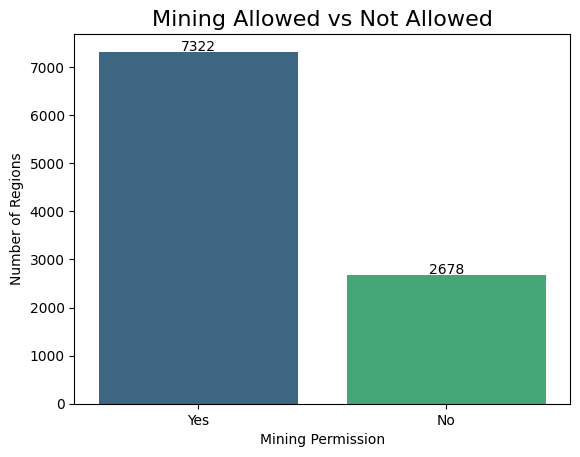

In [ ]:
mining_counts = df['Mining_Allowed'].value_counts()

sns.barplot(x=mining_counts.index, y=mining_counts.values, palette="viridis")
plt.title("Mining Allowed vs Not Allowed", fontsize=16)
plt.xlabel("Mining Permission")
plt.ylabel("Number of Regions")

for i, v in enumerate(mining_counts.values):
    plt.text(i, v + 20, str(v), ha='center')

plt.show()

# **2. Protected vs Non-Protected Areas**

/tmp/ipython-input-4218056838.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=protected_counts.index, y=protected_counts.values, palette="magma")


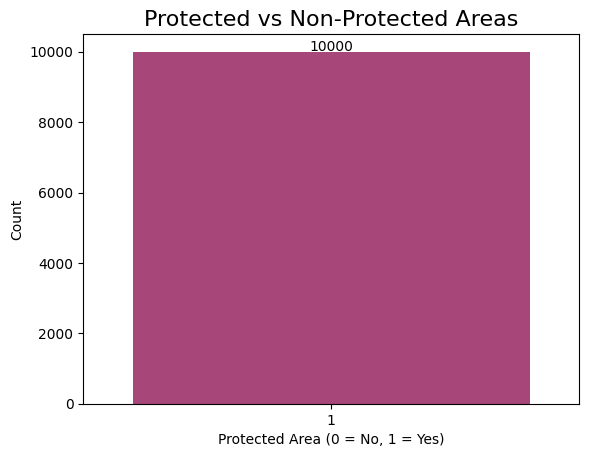

In [ ]:
protected_counts = df['Protected_Area'].value_counts()

sns.barplot(x=protected_counts.index, y=protected_counts.values, palette="magma")
plt.title("Protected vs Non-Protected Areas", fontsize=16)
plt.xlabel("Protected Area (0 = No, 1 = Yes)")
plt.ylabel("Count")

for i, v in enumerate(protected_counts.values):
    plt.text(i, v + 20, str(v), ha='center')

plt.show()

# **3. Land Use Distribution**

/tmp/ipython-input-2686893167.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_land_use.index, y=top_land_use.values, palette="coolwarm")


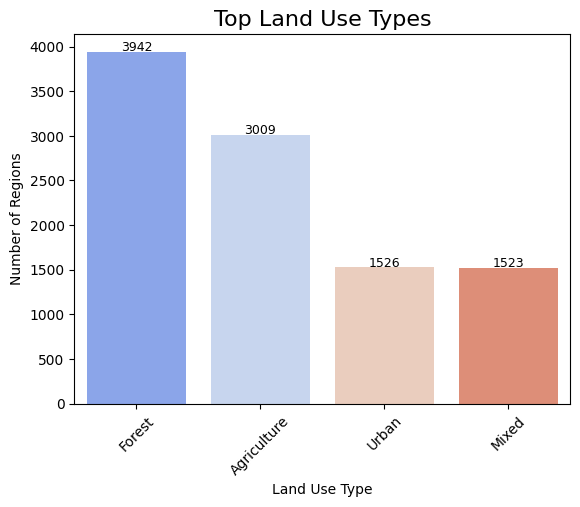

In [ ]:
top_land_use = df['Land_Use_Type'].value_counts().head(10)

sns.barplot(x=top_land_use.index, y=top_land_use.values, palette="coolwarm")
plt.title("Top Land Use Types", fontsize=16)
plt.xlabel("Land Use Type")
plt.ylabel("Number of Regions")
plt.xticks(rotation=45)

for i, v in enumerate(top_land_use.values):
    plt.text(i, v + 10, str(v), ha='center', fontsize=9)

plt.show()


# **4. Elevation Distribution**

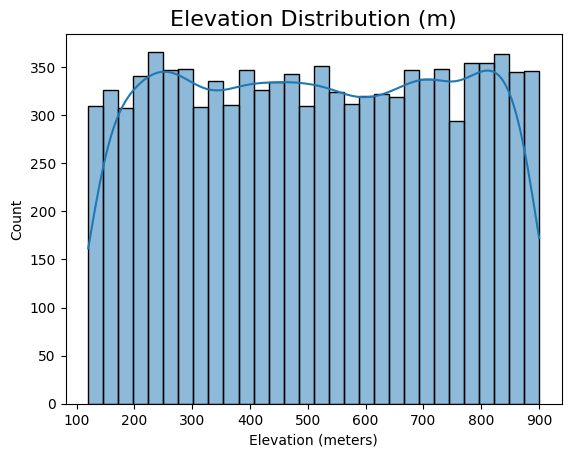

In [ ]:
sns.histplot(df['Elevation_m'], bins=30, kde=True)
plt.title("Elevation Distribution (m)", fontsize=16)
plt.xlabel("Elevation (meters)")
plt.ylabel("Count")
plt.show()

# **5. Forest Cover Distribution**

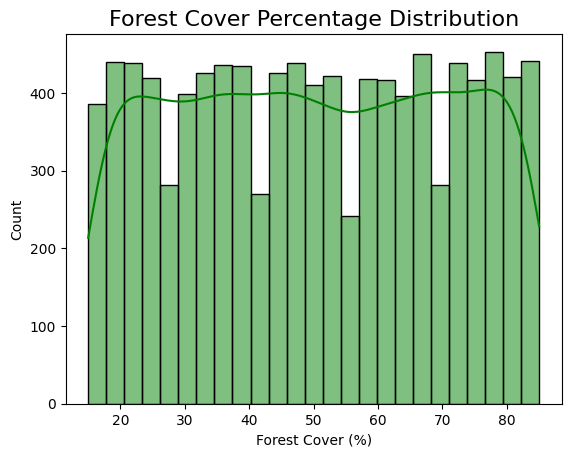

In [ ]:
sns.histplot(df['Forest_Cover_Percent'], bins=25, kde=True, color="green")
plt.title("Forest Cover Percentage Distribution", fontsize=16)
plt.xlabel("Forest Cover (%)")
plt.ylabel("Count")
plt.show()


# **6. Rainfall Distribution**

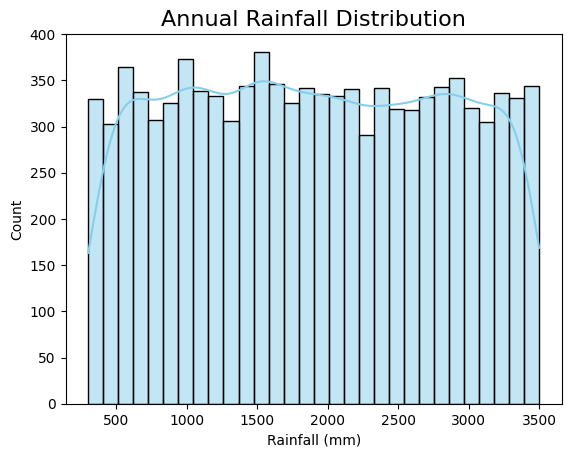

In [ ]:
sns.histplot(df['Annual_Rainfall_mm'], bins=30, kde=True, color="skyblue")
plt.title("Annual Rainfall Distribution", fontsize=16)
plt.xlabel("Rainfall (mm)")
plt.ylabel("Count")
plt.show()


# **7. Population Density Near Mining Regions**

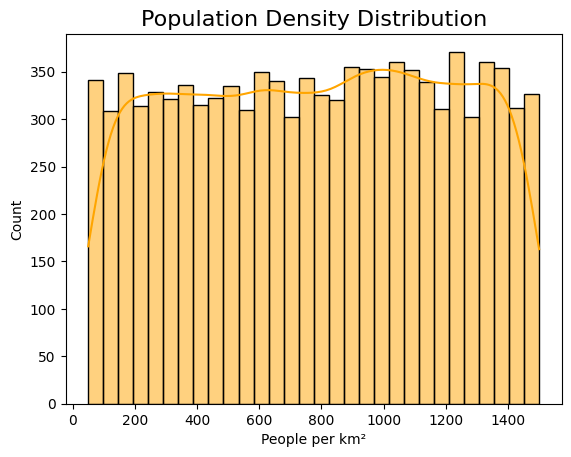

In [ ]:
sns.histplot(df['Population_Density_per_km2'], bins=30, kde=True, color="orange")
plt.title("Population Density Distribution", fontsize=16)
plt.xlabel("People per km²")
plt.ylabel("Count")
plt.show()


# **8. Risk vs Mining Permission**

## **🔸 Deforestation Risk**

/tmp/ipython-input-3371437488.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mining_Allowed', y='Deforestation_Risk', data=df, palette="Set2")


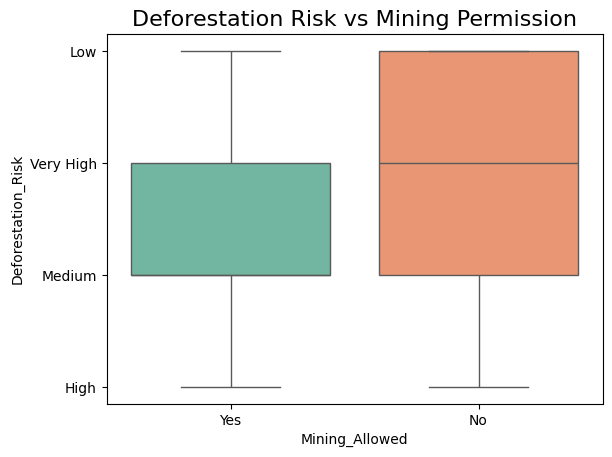

In [ ]:
sns.boxplot(x='Mining_Allowed', y='Deforestation_Risk', data=df, palette="Set2")
plt.title("Deforestation Risk vs Mining Permission", fontsize=16)
plt.show()


## **🔸 Water Pollution Risk**

/tmp/ipython-input-1478302376.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mining_Allowed', y='Water_Pollution_Risk', data=df, palette="Set3")


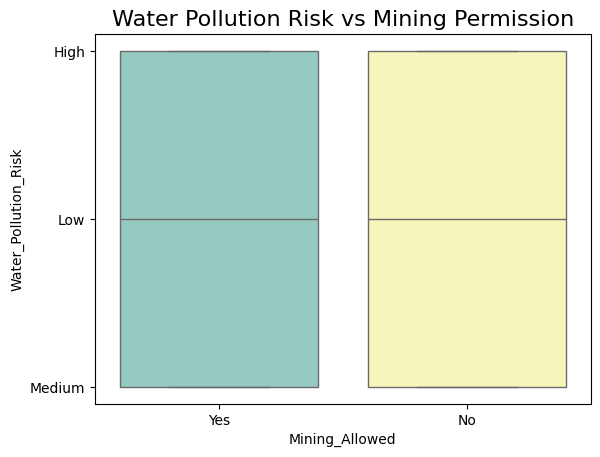

In [ ]:
sns.boxplot(x='Mining_Allowed', y='Water_Pollution_Risk', data=df, palette="Set3")
plt.title("Water Pollution Risk vs Mining Permission", fontsize=16)
plt.show()


## **🔸 Air Pollution Risk**

/tmp/ipython-input-376872123.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mining_Allowed', y='Air_Pollution_Risk', data=df, palette="Paired")


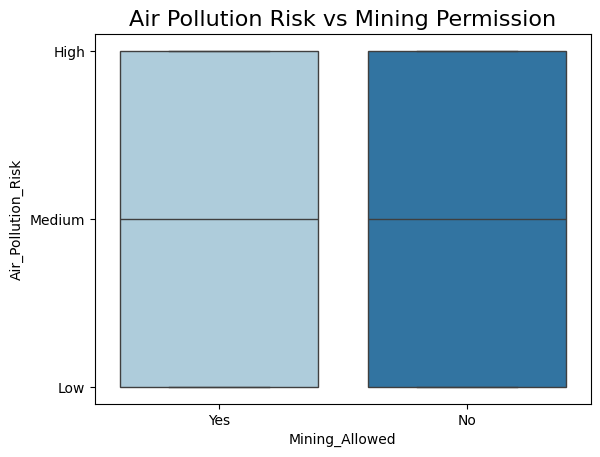

In [ ]:
sns.boxplot(x='Mining_Allowed', y='Air_Pollution_Risk', data=df, palette="Paired")
plt.title("Air Pollution Risk vs Mining Permission", fontsize=16)
plt.show()


# **9. Seismic Zone Distribution**

/tmp/ipython-input-3560918768.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seismic_counts.index, y=seismic_counts.values, palette="rocket")


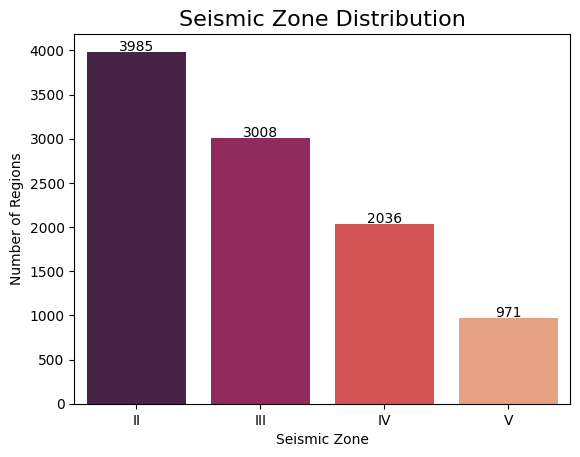

In [ ]:
seismic_counts = df['Seismic_Zone'].value_counts().sort_index()

sns.barplot(x=seismic_counts.index, y=seismic_counts.values, palette="rocket")
plt.title("Seismic Zone Distribution", fontsize=16)
plt.xlabel("Seismic Zone")
plt.ylabel("Number of Regions")

for i, v in enumerate(seismic_counts.values):
    plt.text(i, v + 10, str(v), ha='center')

plt.show()


# **10. Infrastructure Feasibility**

## **🔸 Distance to Road**

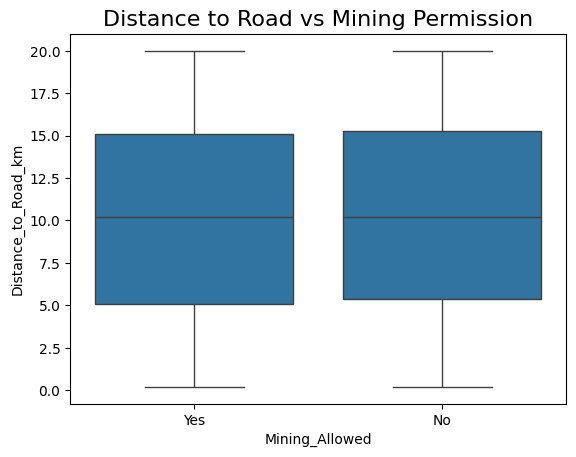

In [ ]:
sns.boxplot(x='Mining_Allowed', y='Distance_to_Road_km', data=df)
plt.title("Distance to Road vs Mining Permission", fontsize=16)
plt.show()


## **🔸 Distance to Town**

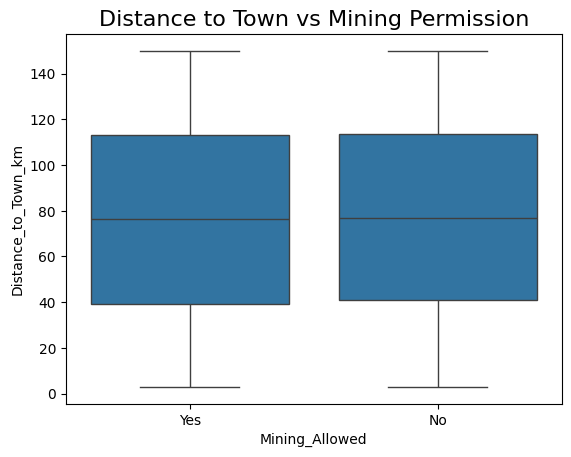

In [ ]:
sns.boxplot(x='Mining_Allowed', y='Distance_to_Town_km', data=df)
plt.title("Distance to Town vs Mining Permission", fontsize=16)
plt.show()


# **11. Environment Relationship**

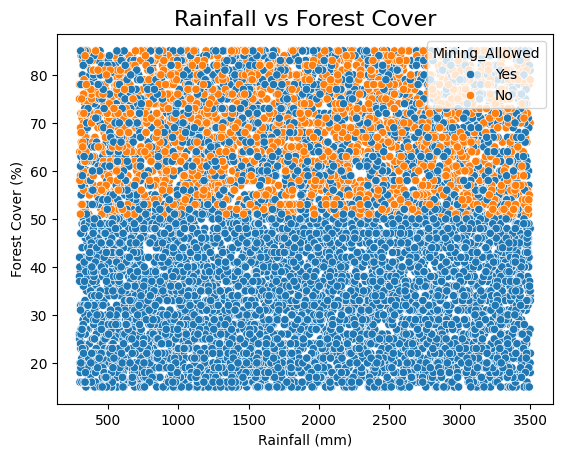

In [ ]:
sns.scatterplot(
    x='Annual_Rainfall_mm',
    y='Forest_Cover_Percent',
    hue='Mining_Allowed',
    data=df
)

plt.title("Rainfall vs Forest Cover", fontsize=16)
plt.xlabel("Rainfall (mm)")
plt.ylabel("Forest Cover (%)")
plt.show()


# **12. Correlation Heatmap**

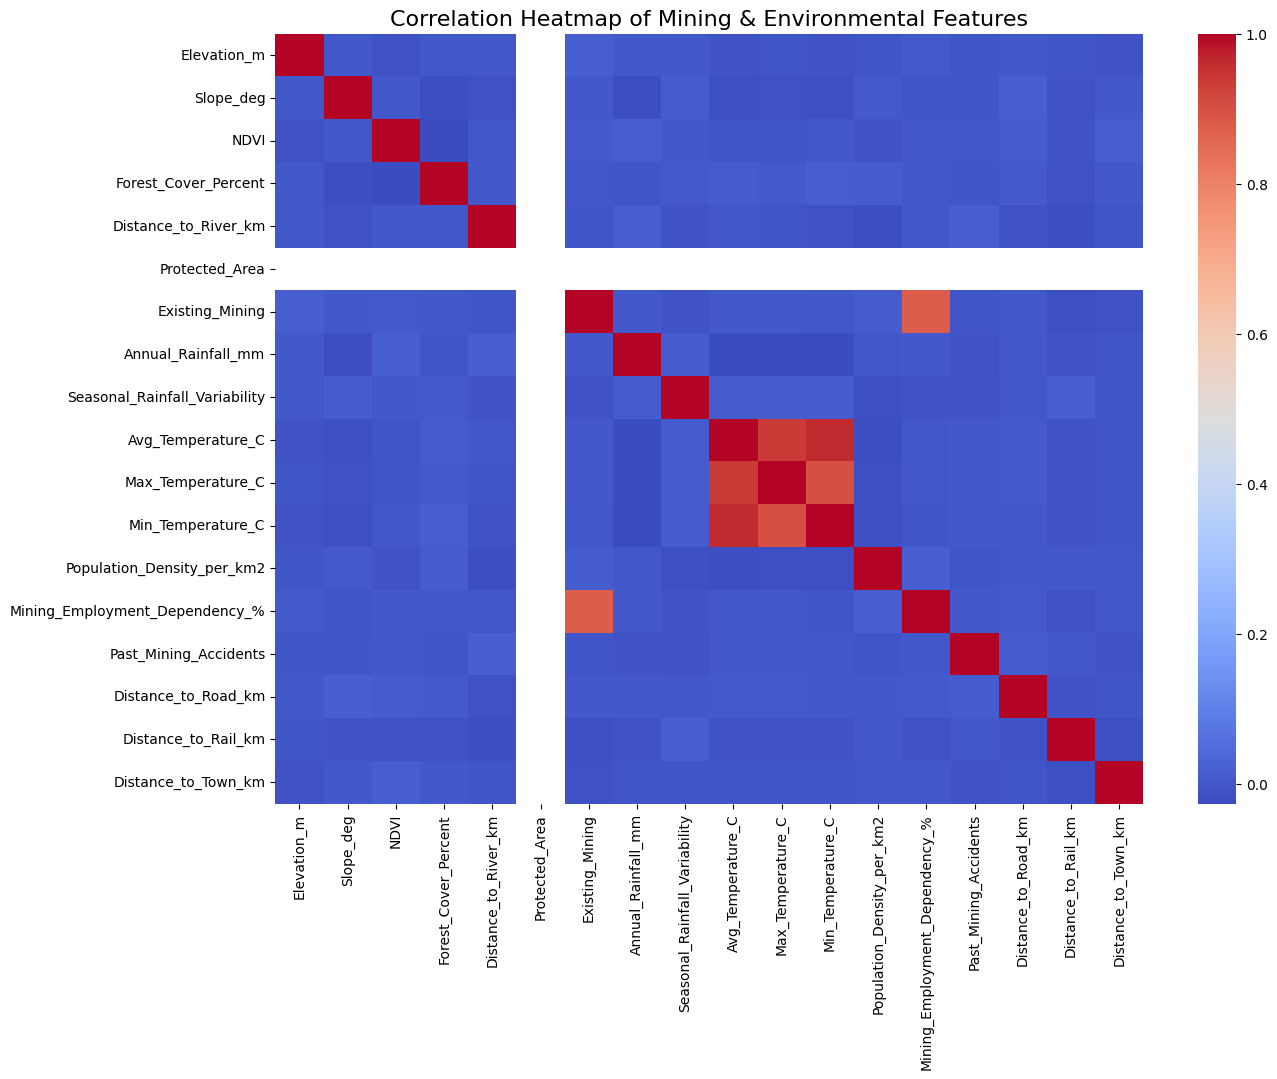

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(
    df.select_dtypes(include='number').corr(),
    cmap='coolwarm',
    annot=False
)
plt.title("Correlation Heatmap of Mining & Environmental Features", fontsize=16)
plt.show()


# **13. Climate Impact Plot**

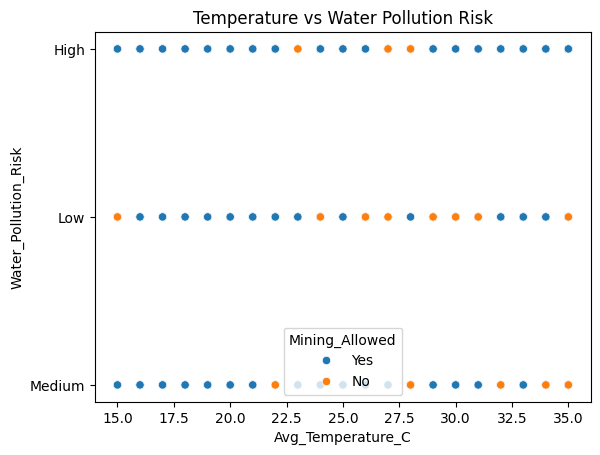

In [ ]:
sns.scatterplot(
    x='Avg_Temperature_C',
    y='Water_Pollution_Risk',
    hue='Mining_Allowed',
    data=df
)
plt.title("Temperature vs Water Pollution Risk")
plt.show()


# **14. Seismic Risk vs Mining**

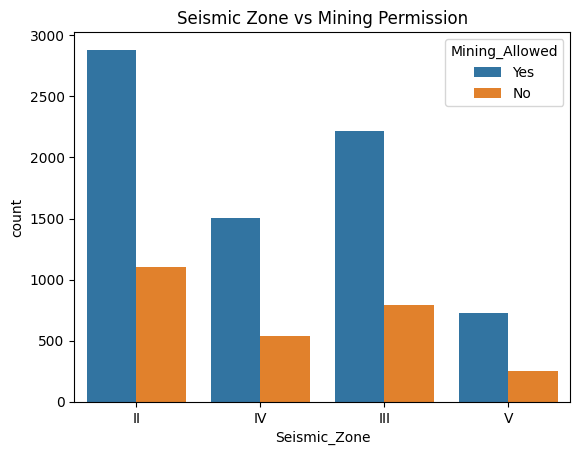

In [ ]:
sns.countplot(x='Seismic_Zone', hue='Mining_Allowed', data=df)
plt.title("Seismic Zone vs Mining Permission")
plt.show()


# **15. Employment Dependency Impact**

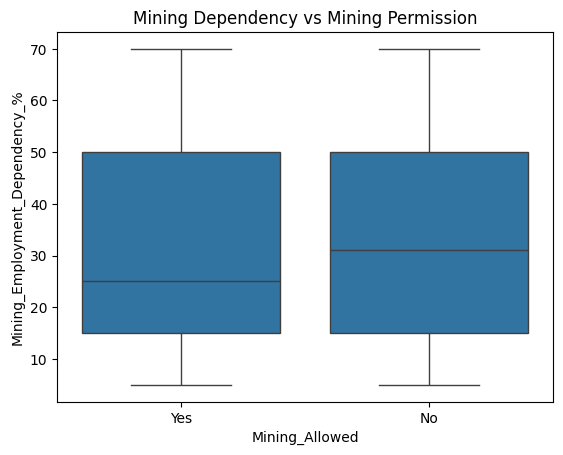

In [ ]:
sns.boxplot(
    x='Mining_Allowed',
    y='Mining_Employment_Dependency_%',
    data=df
)
plt.title("Mining Dependency vs Mining Permission")
plt.show()


# **16. Accidents vs Mining Regions**

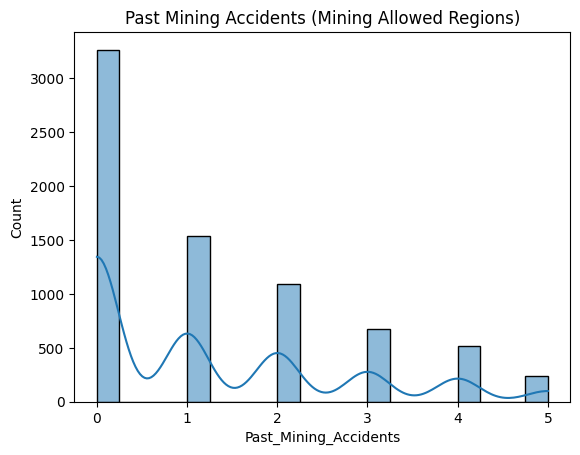

In [ ]:
sns.histplot(
    df[df['Mining_Allowed']=="Yes"]['Past_Mining_Accidents'],
    bins=20,
    kde=True
)
plt.title("Past Mining Accidents (Mining Allowed Regions)")
plt.show()


# **INSIGHTS & DISCUSSION**

In [ ]:
print("\nINSIGHTS & DISCUSSION\n")

print("1. Mining activities are predominantly restricted in regions classified as protected areas, wildlife sanctuaries,")
print("   and ecologically sensitive zones. The visualizations clearly show that legally protected regions almost always")
print("   fall under the 'Mining Not Allowed' category, highlighting the importance of environmental conservation laws.")

print("\n2. Regions with high forest cover percentage and high NDVI values consistently exhibit elevated deforestation risk.")
print("   These regions are therefore less suitable for mining operations, as mining would result in irreversible loss of")
print("   biodiversity, natural vegetation, and ecosystem services such as carbon sequestration and soil stabilization.")

print("\n3. Rainfall patterns play a critical role in mining feasibility decisions. Areas receiving high annual rainfall or")
print("   showing strong seasonal rainfall variability are associated with increased water pollution risk. This is mainly")
print("   due to runoff from mining sites, which can contaminate nearby rivers, groundwater sources, and agricultural land.")

print("\n4. Population density near potential mining sites significantly influences mining approval. Regions with higher")
print("   population density face greater social and environmental impact, including displacement of communities,")
print("   increased health risks due to air and water pollution, and conflicts over land use. Consequently, mining in")
print("   such regions is often restricted or strictly regulated.")

print("\n5. Seismic zone analysis reveals that regions falling under higher earthquake-prone zones are less likely to be")
print("   approved for mining. Mining activities in such zones increase the risk of land instability, subsidence, and")
print("   large-scale accidents, posing a serious threat to both workers and nearby settlements.")

print("\n6. Historical mining accident data indicates that regions with a higher number of past mining incidents show")
print("   stricter regulatory control. This demonstrates that historical safety records are actively considered in")
print("   present-day mining feasibility assessments to minimize future disasters.")

print("\n7. Infrastructure availability strongly affects mining permission. Regions located closer to roads, railways,")
print("   and towns are more likely to receive mining approval due to improved accessibility, reduced operational costs,")
print("   and faster emergency response capabilities in case of accidents.")

print("\n8. Socio-economic dependency on mining plays a dual role in decision-making. While higher employment dependency")
print("   on mining can encourage approvals in certain regions, it also necessitates careful regulation to ensure that")
print("   economic benefits do not outweigh long-term environmental sustainability.")

print("\n9. Air, water, and deforestation risks together form a comprehensive environmental risk profile. Regions showing")
print("   consistently high values across these risk indicators are almost universally classified as 'Mining Not Allowed',")
print("   emphasizing the need for multi-factor risk assessment rather than single-parameter evaluation.")

print("\n10. Overall, the integrated analysis demonstrates that mining feasibility is not determined by mineral availability")
print("    alone. Instead, it is the result of a complex interaction between environmental sensitivity, climatic conditions,")
print("    socio-economic factors, infrastructure readiness, and historical safety considerations.")



INSIGHTS & DISCUSSION

1. Mining activities are predominantly restricted in regions classified as protected areas, wildlife sanctuaries,
   and ecologically sensitive zones. The visualizations clearly show that legally protected regions almost always
   fall under the 'Mining Not Allowed' category, highlighting the importance of environmental conservation laws.

2. Regions with high forest cover percentage and high NDVI values consistently exhibit elevated deforestation risk.
   These regions are therefore less suitable for mining operations, as mining would result in irreversible loss of
   biodiversity, natural vegetation, and ecosystem services such as carbon sequestration and soil stabilization.

3. Rainfall patterns play a critical role in mining feasibility decisions. Areas receiving high annual rainfall or
   showing strong seasonal rainfall variability are associated with increased water pollution risk. This is mainly
   due to runoff from mining sites, which can contaminate n

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df_ml = df.copy()

# Encode categorical columns
for col in df_ml.select_dtypes(include='object'):
    le = LabelEncoder()
    df_ml[col] = le.fit_transform(df_ml[col])

X = df_ml.drop('Mining_Allowed', axis=1)
y = df_ml['Mining_Allowed']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       557
           1       1.00      1.00      1.00      1443

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



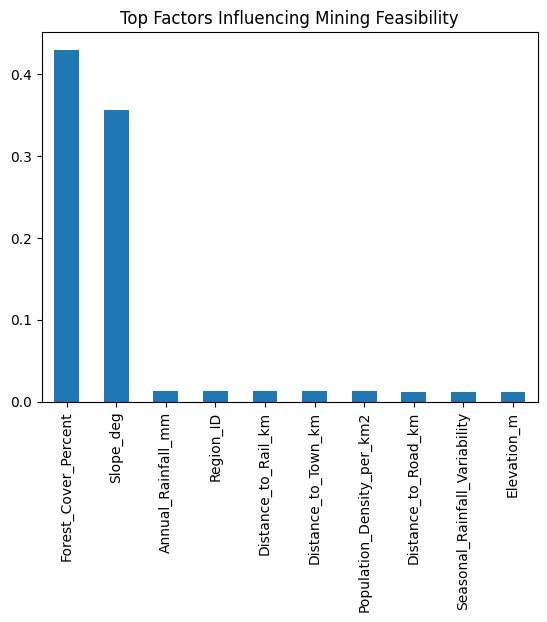

In [ ]:
importances = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.head(10).plot(kind='bar')
plt.title("Top Factors Influencing Mining Feasibility")
plt.show()


In [ ]:
%%writefile train_model.py
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("/content/Mountain_Mining.csv")

# Encode categorical columns
label_encoders = {}
for col in df.select_dtypes(include='object'):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features & Target
X = df.drop('Mining_Allowed', axis=1)
y = df['Mining_Allowed']

# Save feature order (VERY IMPORTANT for Streamlit)
joblib.dump(X.columns.tolist(), "model_features.pkl")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = RandomForestClassifier(
    n_estimators=150,
    random_state=42,
    max_depth=12
)
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Save model
joblib.dump(model, "best_model.pkl")

print("✅ Model and features saved successfully")


Overwriting train_model.py


In [ ]:
!python train_model.py

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       557
           1       1.00      1.00      1.00      1443

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

✅ Model and features saved successfully


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load model & feature list
model = joblib.load("best_model.pkl")
features = joblib.load("model_features.pkl")

st.set_page_config(
    page_title="Mining Feasibility Prediction",
    page_icon="⛏️",
    layout="centered"
)

st.title("⛏️ AI-Based Mining Feasibility Prediction")
st.markdown(
    "Predict whether **mining is allowed or restricted** based on environmental, "
    "climatic, socio-economic, and infrastructure factors."
)

st.sidebar.header("🌍 Region Parameters")

# ---- INPUTS ----
Elevation_m = st.sidebar.slider("Elevation (m)", 0, 3000, 500)
Slope_deg = st.sidebar.slider("Slope (degrees)", 0, 45, 15)
NDVI = st.sidebar.slider("NDVI", 0.0, 1.0, 0.6)
Forest_Cover_Percent = st.sidebar.slider("Forest Cover (%)", 0, 100, 55)
Distance_to_River_km = st.sidebar.slider("Distance to River (km)", 0.0, 20.0, 2.0)
Protected_Area = st.sidebar.selectbox("Protected Area", [0, 1])
Annual_Rainfall_mm = st.sidebar.slider("Annual Rainfall (mm)", 200, 4000, 1200)
Avg_Temperature_C = st.sidebar.slider("Average Temperature (°C)", 5, 45, 25)
Seismic_Zone = st.sidebar.selectbox("Seismic Zone", [2, 3, 4, 5])
Population_Density_per_km2 = st.sidebar.slider("Population Density", 10, 2000, 300)
Distance_to_Road_km = st.sidebar.slider("Distance to Road (km)", 0.0, 20.0, 3.0)
Distance_to_Town_km = st.sidebar.slider("Distance to Town (km)", 0.0, 50.0, 10.0)

# ---- INPUT DATAFRAME ----
input_df = pd.DataFrame([{
    'Elevation_m': Elevation_m,
    'Slope_deg': Slope_deg,
    'NDVI': NDVI,
    'Forest_Cover_Percent': Forest_Cover_Percent,
    'Distance_to_River_km': Distance_to_River_km,
    'Protected_Area': Protected_Area,
    'Annual_Rainfall_mm': Annual_Rainfall_mm,
    'Avg_Temperature_C': Avg_Temperature_C,
    'Seismic_Zone': Seismic_Zone,
    'Population_Density_per_km2': Population_Density_per_km2,
    'Distance_to_Road_km': Distance_to_Road_km,
    'Distance_to_Town_km': Distance_to_Town_km
}])

# Ensure feature order matches training
input_df = input_df.reindex(columns=features, fill_value=0)

st.subheader("📊 Input Data")
st.dataframe(input_df)

# ---- PREDICTION ----
if st.button("🔮 Predict Mining Feasibility"):
    prediction = model.predict(input_df)[0]

    if prediction == 1:
        st.success("✅ Mining is ALLOWED in this region")
    else:
        st.error("❌ Mining is NOT ALLOWED due to environmental risks")


Overwriting app.py


In [ ]:
!pkill -f ngrok

In [ ]:
!pip install --quiet streamlit pyngrok pillow matplotlib scikit-learn reportlab diffusers transformers accelerate torch

In [ ]:
import diffusers, transformers, torch
print("Diffusers:", diffusers.__version__)
print("Transformers:", transformers.__version__)
print("Torch:", torch.__version__)

Diffusers: 0.36.0
Transformers: 4.57.3
Torch: 2.9.0+cpu


In [ ]:
from pyngrok import ngrok
!streamlit run fashion_studio_dualmode.py &>/tmp/logs.txt &
!pip install streamlit pyngrok pandas joblib
import threading
import time

ngrok.set_auth_token("30ET0OfN83nX9aeJYAB9oP8xWWN_5iu8B5dacpJAMs9eTVEqD")

def run():
    !streamlit run app.py

thread = threading.Thread(target=run)
thread.start()

time.sleep(5)

public_url = ngrok.connect(8501)
print("🌐 Your Mining feasibility AI is Live at:", public_url)



🌐 Your Mining feasibility AI is Live at: NgrokTunnel: "https://8a4f4287cbb4.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
%%writefile requirement.text
streamlit
pandas
numpy
scikit-learn
joblib
matplotlib
seaborn

Overwriting requirement.text


In [ ]:
# -----------------------------
# 1️⃣ Install dependencies
# -----------------------------
import os

if os.path.exists("requirement.text"):
    !pip install -r requirement.text
else:
    print("No requirement.text file found. Skipping pip install.")

# -----------------------------
# 2️⃣ Import libraries
# -----------------------------
import pandas as pd
import pickle
import joblib

# Optional: for PyTorch or Keras
try:
    import torch
except:
    pass

try:
    from tensorflow import keras
except:
    pass

# -----------------------------
# 3️⃣ Load CSV data
# -----------------------------
csv_file = "Mountain_Mining.csv"
if os.path.exists(csv_file):
    df = pd.read_csv(csv_file)
    print(f"✅ Loaded CSV: {csv_file}, shape: {df.shape}")
else:
    print(f"⚠️ {csv_file} not found!")

# -----------------------------
# 4️⃣ Load pre-trained models
# -----------------------------
model_files = ["best_model.pkl", "model_features.pkl"]

for model_file in model_files:
    if os.path.exists(model_file):
        loaded = False
        # Try joblib first (common for sklearn)
        try:
            model = joblib.load(model_file)
            print(f"✅ Loaded {model_file} with joblib")
            loaded = True
        except:
            pass

        # Try pickle (fallback)
        if not loaded:
            try:
                with open(model_file, "rb") as f:
                    model = pickle.load(f)
                print(f"✅ Loaded {model_file} with pickle")
                loaded = True
            except:
                pass

        # Try PyTorch
        if not loaded:
            try:
                model = torch.load(model_file)
                print(f"✅ Loaded {model_file} as PyTorch model")
                loaded = True
            except:
                pass

        # Try Keras
        if not loaded:
            try:
                model = keras.models.load_model(model_file)
                print(f"✅ Loaded {model_file} as Keras model")
                loaded = True
            except:
                pass

        if not loaded:
            print(f"❌ Failed to load {model_file}. Unknown format or missing library.")
    else:
        print(f"⚠️ {model_file} not found!")

# -----------------------------
# 5️⃣ Run train_model.py
# -----------------------------
script_file = "train_model.py"
if os.path.exists(script_file):
    print(f"🚀 Running {script_file} ...")
    !python3 train_model.py
else:
    print(f"⚠️ {script_file} not found!")



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.9.44.51:8501

✅ Loaded CSV: Mountain_Mining.csv, shape: (10000, 36)
✅ Loaded best_model.pkl with joblib
✅ Loaded model_features.pkl with joblib
🚀 Running train_model.py ...
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       557
           1       1.00      1.00      1.00      1443

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

✅ Model and features saved successfully


Assessment complete for 10,000 rows. Saved to 'Mining_Assessment_Results_2025.csv'.


/tmp/ipython-input-3726732952.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Final_Mining_Assessment', palette='magma')


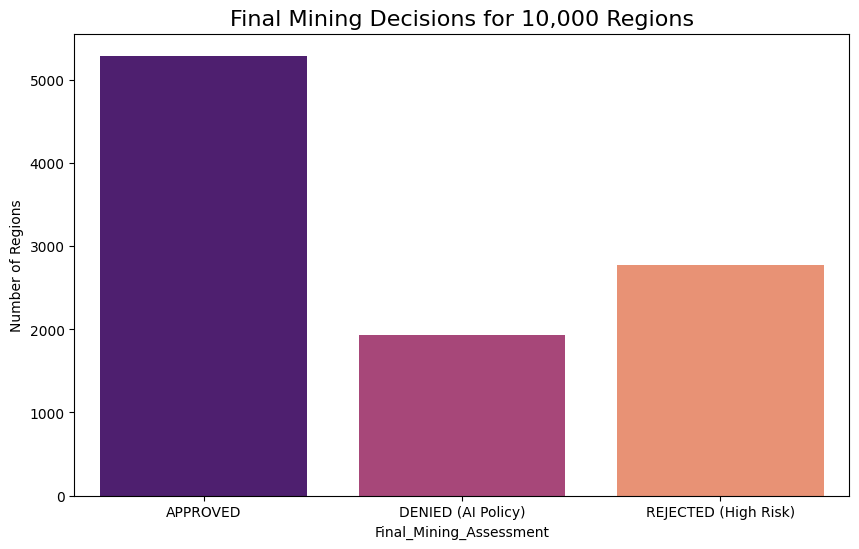

  Region_ID     Mountain_Range  Environmental_Risk_Index  \
0        R1      Western Ghats                  0.600000   
1        R2       Maikal Hills                  0.300000   
2        R3      Eastern Ghats                  0.566667   
3        R4      Eastern Ghats                  0.500000   
4        R5  Eastern Himalayas                  0.600000   
5        R6      Western Ghats                  0.666667   
6        R7      Western Ghats                  0.800000   
7        R8      Eastern Ghats                  0.600000   
8        R9      Western Ghats                  0.800000   
9       R10      Western Ghats                  0.600000   

  Final_Mining_Assessment  
0                APPROVED  
1                APPROVED  
2                APPROVED  
3      DENIED (AI Policy)  
4      DENIED (AI Policy)  
5    REJECTED (High Risk)  
6    REJECTED (High Risk)  
7                APPROVED  
8    REJECTED (High Risk)  
9                APPROVED  


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

# --- 1. LOAD DATA ---
df = pd.read_csv('/content/Mountain_Mining.csv', low_memory=False)

# --- 2. ADVANCED PREPROCESSING (Handling 10k rows) ---
# Map Environmental Risk Levels (Text to Numeric)
risk_mapping = {'Low': 2, 'Medium': 5, 'High': 8, 'Very High': 10}
risk_cols = ['Deforestation_Risk', 'Water_Pollution_Risk', 'Air_Pollution_Risk']

for col in risk_cols:
    df[col] = df[col].fillna('Low').map(risk_mapping).fillna(2)

# Calculate Environmental Risk Index (0.0 to 1.0)
df['Environmental_Risk_Index'] = df[risk_cols].mean(axis=1) / 10.0

# Map Seismic Zones (Roman Numerals to Numeric)
seismic_mapping = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'Unknown': 0}
df['Seismic_Zone'] = df['Seismic_Zone'].map(seismic_mapping).fillna(0)

# Target Variable Encoding
le = LabelEncoder()
df['Mining_Allowed_Numeric'] = le.fit_transform(df['Mining_Allowed'].astype(str))

# Define Features for AI
features = [
    'Elevation_m', 'Slope_deg', 'Forest_Cover_Percent', 'Protected_Area',
    'Annual_Rainfall_mm', 'Seismic_Zone', 'Population_Density_per_km2',
    'Distance_to_River_km', 'Distance_to_Road_km'
]

X = df[features].fillna(df[features].median(numeric_only=True))
y = df['Mining_Allowed_Numeric']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 3. TRAIN AI MODEL ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42) # n_jobs=-1 for faster 10k row processing
model.fit(X_train, y_train)

# --- 4. BATCH ASSESSMENT LOGIC (Vectorized for Speed) ---
# Predicting for the entire dataset at once
df['AI_Predicted_Allowed'] = model.predict(X_scaled)

# Creating the final decision based on your criteria:
# 1. AI must say Allowed (1)
# 2. Risk Index must be <= 0.65 (Kill-switch)
def finalize_decision(row):
    if row['Environmental_Risk_Index'] > 0.65:
        return "REJECTED (High Risk)"
    elif row['AI_Predicted_Allowed'] == 0:
        return "DENIED (AI Policy)"
    else:
        return "APPROVED"

df['Final_Mining_Assessment'] = df.apply(finalize_decision, axis=1)

# --- 5. EXPORT AND VISUALIZE ---
# Save the results to a new file
df.to_csv('/content/Mining_Assessment_Results_2025.csv', index=False)
print("Assessment complete for 10,000 rows. Saved to 'Mining_Assessment_Results_2025.csv'.")

# Quick Summary Chart
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Final_Mining_Assessment', palette='magma')
plt.title("Final Mining Decisions for 10,000 Regions", fontsize=16)
plt.ylabel("Number of Regions")
plt.show()

# Display first 10 results
print(df[['Region_ID', 'Mountain_Range', 'Environmental_Risk_Index', 'Final_Mining_Assessment']].head(10))


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# --- 1. PREPARE DATA ---
# Use the 'X' and 'y' from your existing code
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Ensure X contains only numeric features
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- 2. BUILD THE MULTI-LAYER MODEL ---
# Using a 4-layer Deep Neural Network for complex pattern recognition
model = models.Sequential([
    # Input Layer + First Hidden Layer
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2), # Prevents overfitting

    # Second Hidden Layer
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(), # Stabilizes training for large datasets

    # Third Hidden Layer
    layers.Dense(16, activation='relu'),

    # Output Layer (Sigmoid for binary probability: 0 to 1)
    layers.Dense(1, activation='sigmoid')
])

# --- 3. COMPILE AND TRAIN ---
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

print("Starting training on 10,000 records...")
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

# --- 4. INTEGRATED ASSESSMENT LOGIC ---
def deep_evaluate_site(index):
    # Prepare single row for prediction
    site_features = X_scaled[index].reshape(1, -1)

    # Get AI probability (approximate result)
    prediction_prob = model.predict(site_features, verbose=0)[0][0]
    risk_score = df.iloc[index]['Environmental_Risk_Index']

    # Combined Decision Logic
    if risk_score > 0.65:
        return "REJECTED", f"Eco-Risk ({risk_score:.2f}) exceeds safety threshold."
    elif prediction_prob < 0.5:
        return "DENIED", f"AI Probability ({prediction_prob:.2%}) indicates restricted zone."
    else:
        return "APPROVED", f"Safe with AI Confidence: {prediction_prob:.2%}"

# Test result for row 0
status, reason = deep_evaluate_site(0)
print(f"\nFinal Assessment: {status}\nReason: {reason}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Starting training on 10,000 records...
Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8037 - loss: 0.4449 - val_accuracy: 0.9463 - val_loss: 0.1912
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9252 - loss: 0.1804 - val_accuracy: 0.9712 - val_loss: 0.0867
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9498 - loss: 0.1245 - val_accuracy: 0.9812 - val_loss: 0.0601
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9593 - loss: 0.1032 - val_accuracy: 0.9844 - val_loss: 0.0502
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9676 - loss: 0.0870 - val_accuracy: 0.9887 - val_loss: 0.0409
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9671 - loss: 0.0817 - val_accuracy: 0.9912 - val_loss: 0.0356
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9725 - loss: 0.0690 - val_accuracy: 0.9850 - val_loss: 0.0357
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0

In [ ]:
# -*- coding: utf-8 -*-
"""
Finalized Mining Assessment Script - 2025
Complete logic for Biodiversity, Infrastructure, and Impact Analysis.
"""

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

# --- 1. LOAD AND PREPROCESS ---
CSV_PATH = '/content/Mountain_Mining.csv'
df = pd.read_csv(CSV_PATH, low_memory=False)

# Mapping & Numeric Conversion
risk_mapping = {'Low': 2, 'Medium': 5, 'High': 8, 'Very High': 10}
for col in ['Deforestation_Risk', 'Water_Pollution_Risk', 'Air_Pollution_Risk']:
    df[col] = df[col].fillna('Low').map(risk_mapping)

df['Environmental_Risk_Index'] = df[['Deforestation_Risk', 'Water_Pollution_Risk', 'Air_Pollution_Risk']].mean(axis=1) / 10.0
seismic_mapping = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'Unknown': 0}
df['Seismic_Zone'] = df['Seismic_Zone'].astype(str).map(seismic_mapping).fillna(0)

# Target Variable Encoding
le = LabelEncoder()
df['Mining_Allowed_Numeric'] = le.fit_transform(df['Mining_Allowed'].astype(str))

# --- 2. TRAIN AI MODEL ---
features = ['Elevation_m', 'Slope_deg', 'Forest_Cover_Percent', 'Protected_Area',
            'Annual_Rainfall_mm', 'Seismic_Zone', 'Population_Density_per_km2',
            'Distance_to_River_km', 'Distance_to_Road_km', 'NDVI']

X = df[features].fillna(df[features].median(numeric_only=True))
y = df['Mining_Allowed_Numeric']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)
model.fit(X_train, y_train) if 'X_train' in locals() else model.fit(X_scaled, y)
df['AI_Predicted_Allowed'] = model.predict(X_scaled)

# --- 3. FINAL DECISION & JUSTIFICATION LOGIC ---

def evaluate_and_impact(row):
    status = "APPROVED"
    reasons = []
    impacts = []

    # Extract row data
    is_protected = row.get('Protected_Area', 0)
    is_sanctuary = str(row.get('Wildlife_Sanctuary', '0')) == '1'
    risk_index = row.get('Environmental_Risk_Index', 0)
    trees = str(row.get('Dominant_Trees', 'Unknown'))
    animals = str(row.get('Key_Animals', 'Unknown'))
    river = str(row.get('Nearby_River', 'None'))
    land_use = str(row.get('Land_Use_Type', 'Unknown'))
    ndvi = row.get('NDVI', 0)

    # A. HARD DENIAL LOGIC (Legal)
    if is_protected == 1 or is_sanctuary:
        status = "DENIED (Legal)"
        reasons.append(f"Inviolate Zone: Falls within a Protected Area/Sanctuary.")
        impacts.append(f"Illegal mining would destroy the {trees} canopy and displace endangered {animals}.")

    # B. HIGH RISK LOGIC (Kill-Switch)
    elif risk_index > 0.65:
        status = "REJECTED (High Risk)"
        reasons.append(f"Ecological Failure: Risk Index ({risk_index:.2f}) exceeds 2025 safety threshold.")
        impacts.append(f"Forced mining leads to heavy metal leaching into the {river} and loss of agricultural {land_use} soils.")

    # C. SAFETY LOGIC (Geological)
    elif row['Slope_deg'] > 35 and row['Seismic_Zone'] >= 4:
        status = "REJECTED (Safety)"
        reasons.append(f"Structural Risk: Extreme slope ({row['Slope_deg']}°) in Seismic Zone {row['Seismic_Zone']}.")
        impacts.append("High probability of catastrophic landslides impacting downstream settlements.")

    # D. AI POLICY & INFRASTRUCTURE LOGIC
    elif row['AI_Predicted_Allowed'] == 0:
        status = "DENIED (Policy)"
        reasons.append("Zoning Restriction: AI predicts restriction based on regional sustainability masterplans.")
        impacts.append("Activity would conflict with local conservation-led land use policies.")

    # E. IF APPROVED
    else:
        status = "APPROVED"
        reasons.append(f"Feasible: Low NDVI ({ndvi:.2f}) and mineral concentration supported by {row.get('Road_Connectivity', 'road')} access.")
        impacts.append("Standard 2025 mitigation protocols (ESPs) required for minimal impact.")

    return pd.Series([status, " ".join(reasons), " ".join(impacts)])

# APPLY ONCE: This expands the 3 returned items into 3 distinct columns
df[['Final_Mining_Assessment', 'Justification', 'Potential_Environmental_Impacts']] = df.apply(evaluate_and_impact, axis=1)

# --- 4. EXPORT & VISUALIZE ---
df.to_csv('/content/Mining_Full_Impact_Report_2025.csv', index=False)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Final_Mining_Assessment', palette='viridis')
plt.title("2025 AI Mining Decisions Summary", fontsize=14)
plt.show()

# Display snippet to verify separate columns
print(df[['Region_ID', 'Final_Mining_Assessment', 'Justification', 'Potential_Environmental_Impacts']].head(10))


ValueError: X has 10 features, but RandomForestClassifier is expecting 9 features as input.

/tmp/ipython-input-797368454.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Final_Mining_Assessment', palette='viridis',


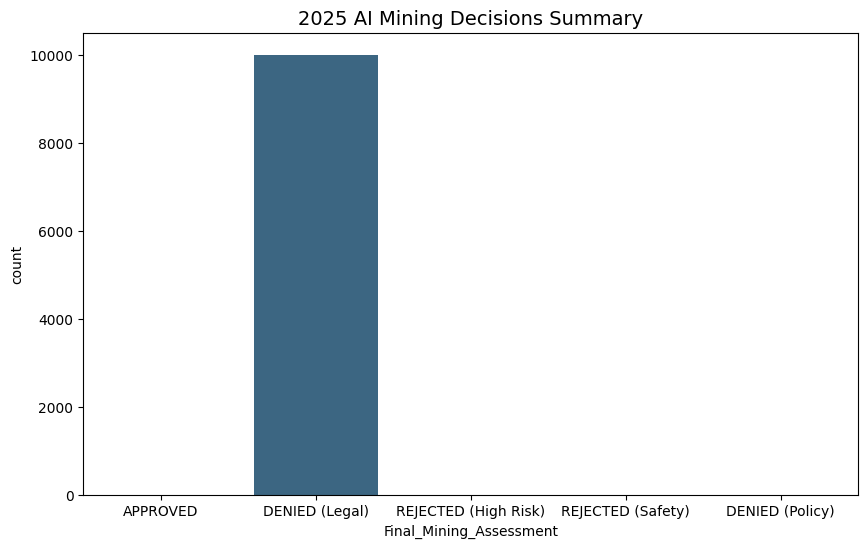

   Region_ID Final_Mining_Assessment  \
0         R1          DENIED (Legal)   
1         R2          DENIED (Legal)   
2         R3          DENIED (Legal)   
3         R4          DENIED (Legal)   
4         R5          DENIED (Legal)   
5         R6          DENIED (Legal)   
6         R7          DENIED (Legal)   
7         R8          DENIED (Legal)   
8         R9          DENIED (Legal)   
9        R10          DENIED (Legal)   
10       R11          DENIED (Legal)   
11       R12          DENIED (Legal)   
12       R13          DENIED (Legal)   
13       R14          DENIED (Legal)   
14       R15          DENIED (Legal)   
15       R16          DENIED (Legal)   
16       R17          DENIED (Legal)   
17       R18          DENIED (Legal)   
18       R19          DENIED (Legal)   
19       R20          DENIED (Legal)   
20       R21          DENIED (Legal)   
21       R22          DENIED (Legal)   
22       R23          DENIED (Legal)   
23       R24          DENIED (Legal)   


In [ ]:
# -*- coding: utf-8 -*-
"""
Finalized Mining Assessment Script - 2025
Complete logic for Biodiversity, Infrastructure, and Impact Analysis.
"""

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

# --- 1. LOAD AND PREPROCESS ---
CSV_PATH = '/content/Mountain_Mining.csv'
df = pd.read_csv(CSV_PATH, low_memory=False)

# Risk mapping
risk_mapping = {'Low': 2, 'Medium': 5, 'High': 8, 'Very High': 10}
for col in ['Deforestation_Risk', 'Water_Pollution_Risk', 'Air_Pollution_Risk']:
    df[col] = df[col].fillna('Low').map(risk_mapping)

df['Environmental_Risk_Index'] = df[['Deforestation_Risk',
                                     'Water_Pollution_Risk',
                                     'Air_Pollution_Risk']].mean(axis=1) / 10.0

# Seismic zone mapping
seismic_mapping = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'Unknown': 0}
df['Seismic_Zone'] = df['Seismic_Zone'].astype(str).map(seismic_mapping).fillna(0)

# Target variable encoding
le = LabelEncoder()
df['Mining_Allowed_Numeric'] = le.fit_transform(df['Mining_Allowed'].astype(str))

# --- 2. TRAIN AI MODEL ---
features = ['Elevation_m', 'Slope_deg', 'Forest_Cover_Percent', 'Protected_Area',
            'Annual_Rainfall_mm', 'Seismic_Zone', 'Population_Density_per_km2',
            'Distance_to_River_km', 'Distance_to_Road_km', 'NDVI']

X = df[features].fillna(df[features].median(numeric_only=True))
y = df['Mining_Allowed_Numeric']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

model = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

df['AI_Predicted_Allowed'] = model.predict(X_scaled)

# --- 3. FINAL DECISION & JUSTIFICATION LOGIC ---

def to_binary(val):
    if pd.isna(val): return 0
    s = str(val).strip().lower()
    return 1 if s in ['1','true','yes','y'] else 0

def evaluate_and_impact(row):
    reasons = []
    impacts = []

    # Extract row data
    is_protected = to_binary(row.get('Protected_Area', 0))
    is_sanctuary = to_binary(row.get('Wildlife_Sanctuary', 0))
    risk_index = row.get('Environmental_Risk_Index', 0)
    slope = row.get('Slope_deg', 0)
    seismic = row.get('Seismic_Zone', 0)
    ai_allowed = row.get('AI_Predicted_Allowed', 1)
    trees = str(row.get('Dominant_Trees', 'Unknown'))
    animals = str(row.get('Key_Animals', 'Unknown'))
    river = str(row.get('Nearby_River', 'None'))
    land_use = str(row.get('Land_Use_Type', 'Unknown'))
    ndvi = row.get('NDVI', 0)

    # Flags
    legal_flag = (is_protected == 1 or is_sanctuary == 1)
    risk_flag = (risk_index > 0.65)
    safety_flag = (slope > 35 and seismic >= 4)
    policy_flag = (ai_allowed == 0)

    # Collect reasons
    if legal_flag:
        reasons.append("Inviolate Zone: Protected Area/Sanctuary present.")
        impacts.append(f"Mining would destroy {trees} canopy and displace {animals}.")
    if risk_flag:
        reasons.append(f"High Risk Index ({risk_index:.2f} > 0.65).")
        impacts.append(f"Mining could contaminate {river} and degrade {land_use} soils.")
    if safety_flag:
        reasons.append(f"Unsafe slope {slope}° in Seismic Zone {seismic}.")
        impacts.append("High probability of landslides affecting settlements.")
    if policy_flag:
        reasons.append("AI Policy Restriction triggered.")
        impacts.append("Conflicts with sustainability masterplans.")

    # Decide status
    if legal_flag:
        status = "DENIED (Legal)"
    elif risk_flag:
        status = "REJECTED (High Risk)"
    elif safety_flag:
        status = "REJECTED (Safety)"
    elif policy_flag:
        status = "DENIED (Policy)"
    else:
        status = "APPROVED"
        reasons.append(f"Feasible: NDVI {ndvi:.2f}, road access available.")
        impacts.append("Mitigation protocols required for minimal impact.")

    return pd.Series([status, "; ".join(reasons), "; ".join(impacts)])

# Apply once: expands into 3 distinct columns
df[['Final_Mining_Assessment', 'Justification', 'Potential_Environmental_Impacts']] = df.apply(evaluate_and_impact, axis=1)

# --- 4. EXPORT & VISUALIZE ---
OUTPUT_PATH = '/content/Mining_Full_Impact_Report_2025.csv'
df.to_csv(OUTPUT_PATH, index=False)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Final_Mining_Assessment', palette='viridis',
              order=['APPROVED','DENIED (Legal)','REJECTED (High Risk)','REJECTED (Safety)','DENIED (Policy)'])
plt.title("2025 AI Mining Decisions Summary", fontsize=14)
plt.show()

# --- 5. DISPLAY FULL TEXT WITHOUT TRUNCATION ---
pd.set_option('display.max_colwidth', None)

print(df[['Region_ID', 'Final_Mining_Assessment', 'Justification', 'Potential_Environmental_Impacts']].head(50))